# Reshaping

## Stack

In [1]:
import pandas as pd
import numpy as np

tuples = list(
    zip(
        ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
        ["one", "one", "two", "two", "one", "two", "one", "two"],
    )
)

index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])

df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])

df2 = df[:4]

df2

A         B
first second                    
bar   one    -0.724211 -0.321713
      one    -0.428115 -0.955300
baz   two     1.171343 -0.294092
      two    -0.307048 -1.140186

In [2]:
In [96]: stacked = df2.stack()

In [97]: stacked

first  second   
bar    one     A   -0.724211
               B   -0.321713
               A   -0.428115
               B   -0.955300
baz    two     A    1.171343
               B   -0.294092
               A   -0.307048
               B   -1.140186
dtype: float64

In [3]:
In [98]: stacked.unstack()

ValueError: ignored

In [ ]:
In [99]: stacked.unstack(1)

In [ ]:
In [100]: stacked.unstack(0)

## Pivot tables

In [ ]:
In [101]: df = pd.DataFrame(
              {
                  "A": ["one", "one", "two", "three"] * 3,
                  "B": ["A", "B", "C"] * 4,
                  "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
                  "D": np.random.randn(12),
                  "E": np.random.randn(12),

               }
           )

In [102]: df

In [ ]:
In [103]: pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

Time series

In [ ]:
In [104]: rng = pd.date_range("1/1/2012", periods=100, freq="S")

In [105]: ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [106]: ts.resample("5Min").sum()

In [ ]:
In [107]: rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")

In [108]: ts = pd.Series(np.random.randn(len(rng)), rng)

In [109]: ts

In [ ]:
In [110]: ts_utc = ts.tz_localize("UTC")

In [111]: ts_utc

In [ ]:
In [112]: ts_utc.tz_convert("US/Eastern")

In [ ]:
In [113]: rng = pd.date_range("1/1/2012", periods=5, freq="M")

In [114]: ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [115]: ts

In [ ]:
In [116]: ps.to_period()

In [117]: ps

In [ ]:
In [118]: ps.to_timestamp()

In [ ]:
In [119]: prng = pd.period_range("1990Q1", "2000Q4, freq="Q-NOV")

In [120]: ts = pd.Series(np.random.randn(len(prng)), prng)

In [121]: ts.index = (prng.asfreq("M", "e") + 1).asfreq("H", "s") + 9

In [122]: ts.head()

In [4]:
In [123]: df = pd.DataFrame(
              {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
          )

In [5]:
In [124]: df["grade"] = df["raw_grade"].astype("category")

In [125]: df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [7]:
In [126]: new_categories = ["very good", "good", "very bad"]

In [127]: df["grade"] = df["grade"].cat.rename_categories(new_categories)

In [8]:
In [128]: df["grade"] = df["grade"].cat.set_categories(
              ["very bad", "bad", "medium", "good", "very good"]
)

In [129]: df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [6]:
In [130]: df.sort_values(by="grade")

,id,raw_grade,grade
0,1,a,a
3,4,a,a
4,5,a,a
1,2,b,b
2,3,b,b
5,6,e,e


In [10]:
In [131]: df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

# Plotting

In [13]:
In [132]: import matplotlib.pyplot as plt

In [133]: plt.close("all")

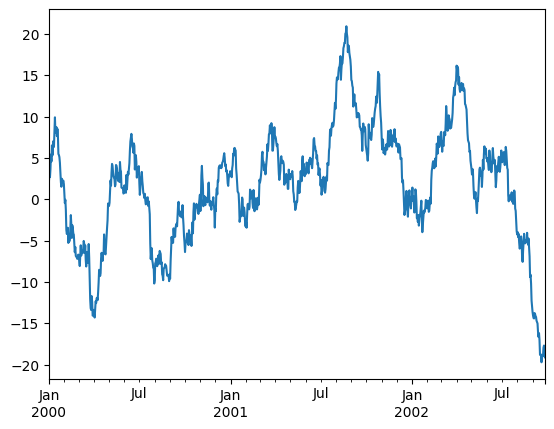

In [17]:
In [134]: ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))

In [135]: ts = ts.cumsum()

In [136]: ts.plot();

In [18]:
In [137]: plt.show();

<Figure size 640x480 with 0 Axes>

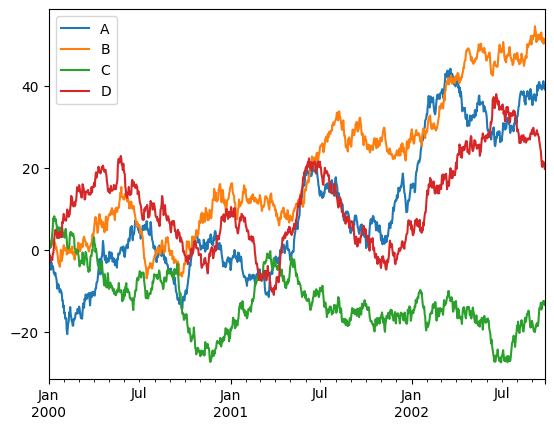

In [20]:
In [138]: df = pd.DataFrame(
         np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
          )

In [139]: df = df.cumsum()

In [140]: plt.figure();

In [141]: df.plot();

In [142]: plt.legend(loc='best');

Importing and exporting data

## csv

In [21]:
In [143]: df.to_csv("foo.csv")

In [22]:
In [144]: pd.read_csv("foo.csv")

,Unnamed: 0,A,B,C,D
0,2000-01-01,-1.934818,0.612755,0.324453,-0.529035
1,2000-01-02,-2.919143,1.210236,1.653255,-0.945368
2,2000-01-03,-4.463588,0.838252,1.171108,-1.240566
3,2000-01-04,-4.712643,1.035614,0.614118,-1.504106
4,2000-01-05,-4.681128,2.244706,0.908908,-2.626689
...,...,...,...,...,...
995,2002-09-22,40.604985,51.859576,-12.464767,21.718086
996,2002-09-23,41.292153,50.499274,-12.491129,20.987560
997,2002-09-24,40.582435,50.452741,-12.325359,21.487364
998,2002-09-25,39.595757,50.942934,-12.952482,20.985043


## HDF5

In [23]:
In [145]: df.to_hdf("foo.h5", "df")

In [24]:
In [146]: pd.read_hdf("foo.h5", "df")

,A,B,C,D
2000-01-01,-1.934818,0.612755,0.324453,-0.529035
2000-01-02,-2.919143,1.210236,1.653255,-0.945368
2000-01-03,-4.463588,0.838252,1.171108,-1.240566
2000-01-04,-4.712643,1.035614,0.614118,-1.504106
2000-01-05,-4.681128,2.244706,0.908908,-2.626689
...,...,...,...,...
2002-09-22,40.604985,51.859576,-12.464767,21.718086
2002-09-23,41.292153,50.499274,-12.491129,20.987560
2002-09-24,40.582435,50.452741,-12.325359,21.487364
2002-09-25,39.595757,50.942934,-12.952482,20.985043


## Excel

In [25]:
In [147]: df.to_excel("foo.xlsx", sheet_name="Sheet1")

In [27]:
from pandas.io.excel import read_excel
In [148]: pd.read_excel("foo.xlsx", "Sheet1", index_col=None, na_values=["NA"])

,Unnamed: 0,A,B,C,D
0,2000-01-01,-1.934818,0.612755,0.324453,-0.529035
1,2000-01-02,-2.919143,1.210236,1.653255,-0.945368
2,2000-01-03,-4.463588,0.838252,1.171108,-1.240566
3,2000-01-04,-4.712643,1.035614,0.614118,-1.504106
4,2000-01-05,-4.681128,2.244706,0.908908,-2.626689
...,...,...,...,...,...
995,2002-09-22,40.604985,51.859576,-12.464767,21.718086
996,2002-09-23,41.292153,50.499274,-12.491129,20.987560
997,2002-09-24,40.582435,50.452741,-12.325359,21.487364
998,2002-09-25,39.595757,50.942934,-12.952482,20.985043


# Gotchas

In [30]:
In [149]: if pd.Series([False, True, False]):
               print("I was true")

ValueError: ignored